In [1]:
from model_api import PoseExtraction
import numpy as np
p=PoseExtraction(r"C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT")

c:\Users\A\anaconda3\envs\PCT_new_new\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\A\anaconda3\envs\PCT_new_new\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


Error importing BURST due to missing underlying dependency: No module named 'tabulate'
load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_x101_64x4d_fpn_20e_coco/cascade_rcnn_x101_64x4d_fpn_20e_coco_20200509_224357-051557b1.pth
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylay

<module 'matplotlib.pyplot' from 'c:\\Users\\A\\anaconda3\\envs\\PCT_new_new\\lib\\site-packages\\matplotlib\\pyplot.py'>

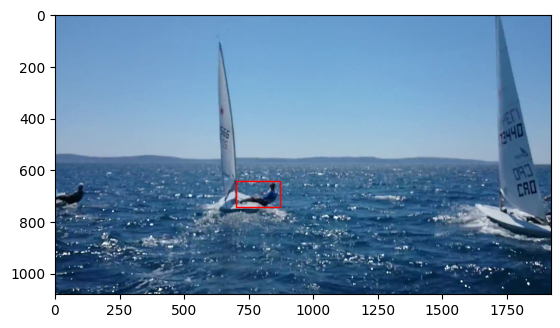

In [10]:
x_start = 700
x_end = 870
y_start = 640
y_end = 740
video=r"C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\videos\5a_Tonci_Stipanovic_Upwind_10_Kn.mp4"
init_bbox=[x_start,y_start,x_end,y_end]
p.vis_bbox_first_frame(init_bbox,video)

In [11]:
import os
from pathlib import Path
import cv2
from PIL import Image
p.setup_frames_data_dir(video)
init_bbox=[x_start,y_start,x_end,y_end]
human_poses=[]
upscaled_frames = []
start_frame = 0
human_bboxes_all=[]
for batch in p.load_image_batch(100):
    #1-5
    sot_bbox_batch=p.calculate_sot_bbox(batch,init_bbox,0)
    cropped_batch=p.crop_video_bbox(batch,sot_bbox_batch)
    upscaled_batch=p.superres_video(cropped_batch)
    human_bboxes_batch=p.yolo_segmentation(upscaled_batch)
    human_bboxes_all.append(human_bboxes_batch)
    human_poses_batch=p.pct_pose_estimation(upscaled_batch,human_bboxes_batch)
    
    #append and set init_bbox for next iteration, and increment starting frame for next batch
    for item in human_poses_batch:
        human_poses.append(item)
    if not os.path.exists(str((Path("temp") / Path("upscaled")))):
            os.makedirs(str((Path("temp") / Path("upscaled"))))
    for i,frame in enumerate(upscaled_batch):
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB
        pil_image = Image.fromarray(frame_rgb)
        pil_image.save(str(Path("temp") / Path("upscaled") / Path(f"img_{start_frame+i:06}.jpg")))
    init_bbox=sot_bbox_batch[-1]["bbox"][:4] #[]"bbox"] because its a map, [:4] to ditch the probability
    start_frame+=len(batch)
#p.delete_frames_data_dir()

C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\videos\5a_Tonci_Stipanovic_Upwind_10_Kn.mp4
writing each frame of video to C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\temp


  0%|                                                         | 0/5067

100%|██████████████████████████████████████████████████████| 5067/5067
2023-07-05 00:33:02,909 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:33:02,910 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:33:02,911 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.9 task/s, elapsed: 6s, ETA:     0swidth,height:(182, 129)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1708.8 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 1 person, 6: 384x640 2 persons, 7: 384x640 1 person, 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 (no detections), 17: 384x640 1 person, 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 1 person, 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 (no detection

[                                ] 2/100, 10.6 task/s, elapsed: 0s, ETA:     9s

c:\Users\A\anaconda3\envs\PCT_new_new\lib\site-packages\torch\utils\checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


[>>>>>                          ] 18/100, 10.0 task/s, elapsed: 2s, ETA:     8s

2023-07-05 00:33:18,722 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:33:18,723 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:33:18,723 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.8 task/s, elapsed: 6s, ETA:     0swidth,height:(187, 136)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1708.9 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 (no detections), 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections),

[>>>>>                          ] 18/100, 10.3 task/s, elapsed: 2s, ETA:     8s

2023-07-05 00:33:31,631 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:33:31,632 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:33:31,633 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 18.1 task/s, elapsed: 6s, ETA:     0swidth,height:(241, 114)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1652.5 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 2 persons, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 1 person, 22: 384x640 (no detections), 23: 384x640 1 person, 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 1 person, 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 (no detections), 35: 384x640 (no detections), 3

[>>>>>>>>>>>>>                   ] 41/100, 9.4 task/s, elapsed: 4s, ETA:     6s

2023-07-05 00:33:47,408 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:33:47,409 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:33:47,410 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 16.9 task/s, elapsed: 6s, ETA:     0swidth,height:(253, 92)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1694.9 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 2 persons, 5: 384x640 1 person, 6: 384x640 2 persons, 7: 384x640 1 person, 8: 384x640 (no detections), 9: 384x640 1 person, 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 1 person, 31: 384x640 (no detections), 32: 384x640 (no detection

[>>>>>>                          ] 21/100, 8.8 task/s, elapsed: 2s, ETA:     9s

2023-07-05 00:34:01,279 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:34:01,280 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:34:01,281 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.9 task/s, elapsed: 6s, ETA:     0swidth,height:(263, 106)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1652.5 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 1 person, 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 2 persons, 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 2 persons, 28: 384x640 1 person, 29: 384x640 2 persons, 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 1 person, 33: 384x640 1 pe

[>>>>>>>>>>>>                   ] 40/100, 10.6 task/s, elapsed: 4s, ETA:     6s

2023-07-05 00:34:16,212 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:34:16,213 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:34:16,214 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.9 task/s, elapsed: 6s, ETA:     0swidth,height:(287, 130)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1738.8 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 1 person, 29: 384x640 (no detections), 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 2 persons, 34: 384x640 (no detections), 35: 384x640 (no detections), 36: 384x640 1 person, 

[>>>>>>>>>>>>>                  ] 45/100, 10.2 task/s, elapsed: 4s, ETA:     5s

2023-07-05 00:34:31,819 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:34:31,820 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:34:31,820 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 18.0 task/s, elapsed: 6s, ETA:     0swidth,height:(328, 130)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1652.4 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 2 persons, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 1 person, 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 1 person, 24: 384x640 (no detections), 25: 384x640 2 persons, 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 1 person, 32: 384x640 (no detections), 33: 384x64

[>>>>>>>>>>>>>                   ] 41/100, 9.7 task/s, elapsed: 4s, ETA:     6s

2023-07-05 00:34:47,231 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:34:47,232 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:34:47,232 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 18.0 task/s, elapsed: 6s, ETA:     0swidth,height:(328, 130)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1665.5 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 (no detections), 2: 384x640 1 person, 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 2 persons, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 1 person, 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 (no detections), 34: 384x640 1 per

[>>>>>>>>                        ] 25/100, 8.9 task/s, elapsed: 3s, ETA:     8s

2023-07-05 00:35:01,431 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:35:01,432 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:35:01,433 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.4 task/s, elapsed: 6s, ETA:     0swidth,height:(306, 120)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1459.5 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 2 persons, 2: 384x640 (no detections), 3: 384x640 1 person, 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 1 person, 13: 384x640 (no detections), 14: 384x640 1 person, 15: 384x640 (no detections), 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 (no detections), 32: 384x640 1 person, 33: 384x640 (no detections), 34: 384x640 1 person, 35: 384x640 (no 

[>>>>>>>>>>>>>                  ] 42/100, 10.0 task/s, elapsed: 4s, ETA:     6s

2023-07-05 00:35:17,418 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:35:17,419 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:35:17,419 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 16.0 task/s, elapsed: 6s, ETA:     0swidth,height:(268, 108)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1769.3 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 1 person, 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 2 persons, 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 1 person, 33: 384x640

[>>>>>>                         ] 20/100, 10.0 task/s, elapsed: 2s, ETA:     8s

2023-07-05 00:35:31,713 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:35:31,714 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:35:31,715 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 16.2 task/s, elapsed: 6s, ETA:     0swidth,height:(322, 129)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1752.2 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 (no detections), 16: 384x640 1 person, 17: 384x640 (no detections), 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 2 persons, 25: 384x640 1 person, 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 (no detections), 33: 384x640 (no detections), 34: 384x640 (no detectio

[>>>>>>>>>>                      ] 34/100, 8.9 task/s, elapsed: 4s, ETA:     7s

2023-07-05 00:35:47,444 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:35:47,445 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:35:47,445 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 16.3 task/s, elapsed: 6s, ETA:     0swidth,height:(324, 138)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1587.1 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 1 person, 14: 384x640 (no detections), 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 (no detections), 28: 384x640 2 persons, 29: 384x640 (no detections), 30: 384x640 2 persons, 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36: 384

[>>>>>>>>>>>>>>>>>>>>>>>         ] 72/100, 8.4 task/s, elapsed: 9s, ETA:     3s

2023-07-05 00:36:08,136 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:36:08,137 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:36:08,137 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 18.0 task/s, elapsed: 6s, ETA:     0swidth,height:(311, 127)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1680.2 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 1 person, 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 1 person, 32: 384x640 (

[>>>>>>>>>>>>                   ] 39/100, 10.1 task/s, elapsed: 4s, ETA:     6s

2023-07-05 00:36:23,308 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:36:23,309 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:36:23,310 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.5 task/s, elapsed: 6s, ETA:     0swidth,height:(290, 122)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1849.9 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 (no detections), 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 1 person, 16: 384x640 (no detections), 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36: 384x640 1 person, 37: 384x640 1 person, 38: 384x640 1 person,

[>>>>>>>>>>>>>>>>>>>>>>         ] 73/100, 10.5 task/s, elapsed: 7s, ETA:     3s

2023-07-05 00:36:41,775 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:36:41,776 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:36:41,776 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.5 task/s, elapsed: 6s, ETA:     0swidth,height:(270, 113)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1923.1 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 (no detections), 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 (no detections), 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 (no detections), 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 (no detections), 34: 384x640 (no de

[>>>>>>>>>                      ] 32/100, 10.5 task/s, elapsed: 3s, ETA:     6s

2023-07-05 00:36:56,213 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:36:56,214 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:36:56,215 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.5 task/s, elapsed: 6s, ETA:     0swidth,height:(261, 140)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1941.3 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 1 person, 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 1 person, 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 1 person, 31: 384x640 (no detections),

[>>>>>                          ] 19/100, 10.2 task/s, elapsed: 2s, ETA:     8s

2023-07-05 00:37:09,628 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:37:09,629 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:37:09,630 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 16.7 task/s, elapsed: 6s, ETA:     0swidth,height:(277, 156)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1666.4 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 1 person, 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 1 person, 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (n

[>>>>>                           ] 16/100, 9.3 task/s, elapsed: 2s, ETA:     9s

2023-07-05 00:37:23,112 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:37:23,113 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:37:23,113 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.1 task/s, elapsed: 6s, ETA:     0swidth,height:(301, 161)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1490.6 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 1 person, 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no dete

[>>>>>>>>>>                      ] 32/100, 8.2 task/s, elapsed: 4s, ETA:     8s

2023-07-05 00:37:38,912 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:37:38,913 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:37:38,913 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.0 task/s, elapsed: 6s, ETA:     0swidth,height:(296, 160)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1724.1 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 (no detections), 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 2 persons, 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 2 persons, 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x64

[>>>>>>>>>>>>>>                  ] 44/100, 9.0 task/s, elapsed: 5s, ETA:     6s

2023-07-05 00:37:55,425 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:37:55,425 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:37:55,426 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.8 task/s, elapsed: 6s, ETA:     0swidth,height:(339, 194)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1553.1 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 (no detections), 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 1 person, 25: 384x640 (no detections), 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 per

[>>>>>>>>>>>>>>>>               ] 54/100, 10.1 task/s, elapsed: 5s, ETA:     5s

2023-07-05 00:38:12,949 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:38:12,949 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:38:12,950 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.1 task/s, elapsed: 6s, ETA:     0swidth,height:(287, 168)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1526.3 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 1 person, 13: 384x640 (no detections), 14: 384x640 1 person, 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 1 person, 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 1 person, 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections)

[>>>>>>>>>>>>>>>                ] 51/100, 10.0 task/s, elapsed: 5s, ETA:     5s

2023-07-05 00:38:29,759 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:38:29,760 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:38:29,761 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.2 task/s, elapsed: 6s, ETA:     0swidth,height:(557, 228)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1296.6 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 2 persons, 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 3

[>>>>>>>>>>                      ] 34/100, 9.3 task/s, elapsed: 4s, ETA:     7s

2023-07-05 00:38:44,954 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:38:44,955 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:38:44,955 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 16.9 task/s, elapsed: 6s, ETA:     0swidth,height:(351, 147)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1526.2 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36: 384x640 1 person, 37: 384x640 1 person, 38: 384x640 1 person, 39: 384x640 (no detections), 40: 384x640 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>    ] 90/100, 9.9 task/s, elapsed: 9s, ETA:     1s

2023-07-05 00:39:05,735 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:39:05,736 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:39:05,737 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.1 task/s, elapsed: 6s, ETA:     0swidth,height:(332, 127)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1708.8 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 1 person, 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 (no detec

[>>>>>>>>>>>>>>>>>>>             ] 60/100, 9.8 task/s, elapsed: 6s, ETA:     4s

2023-07-05 00:39:23,571 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:39:23,572 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:39:23,573 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.3 task/s, elapsed: 7s, ETA:     0swidth,height:(321, 131)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1801.3 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 (no detections), 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36: 384x640 1 person, 37: 384x640 1 person, 38: 384x640 1 person, 39: 384x640 1 person, 40: 3

[>>>>>>>>>>>>>>>>>>              ] 58/100, 9.7 task/s, elapsed: 6s, ETA:     4s

2023-07-05 00:39:42,285 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:39:42,286 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:39:42,287 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.1 task/s, elapsed: 6s, ETA:     0swidth,height:(403, 231)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1388.8 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 1 person, 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 (no detec

[>>                               ] 8/100, 9.4 task/s, elapsed: 1s, ETA:    10s

2023-07-05 00:39:54,652 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:39:54,654 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:39:54,654 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.0 task/s, elapsed: 6s, ETA:     0swidth,height:(270, 157)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1665.7 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 1 person, 2: 384x640 (no detections), 3: 384x640 1 person, 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections),

[>>                               ] 8/100, 9.9 task/s, elapsed: 1s, ETA:     9s

2023-07-05 00:40:07,045 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:40:07,046 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:40:07,046 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.2 task/s, elapsed: 6s, ETA:     0swidth,height:(253, 146)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1724.0 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384

[>>>                             ] 11/100, 8.5 task/s, elapsed: 1s, ETA:    10s

2023-07-05 00:40:19,839 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:40:19,840 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:40:19,841 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.2 task/s, elapsed: 6s, ETA:     0swidth,height:(262, 112)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1639.2 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 (no det

[>>>>                            ] 13/100, 8.1 task/s, elapsed: 2s, ETA:    11s

2023-07-05 00:40:33,015 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:40:33,016 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:40:33,017 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.0 task/s, elapsed: 6s, ETA:     0swidth,height:(264, 101)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1636.2 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 1 person, 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 38

[>>>>>>                         ] 20/100, 10.2 task/s, elapsed: 2s, ETA:     8s

2023-07-05 00:40:46,592 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:40:46,593 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:40:46,593 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.3 task/s, elapsed: 7s, ETA:     0swidth,height:(262, 104)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1549.9 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 1 person, 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 1 person, 18: 384x640 (no detections), 19: 384x640 1 person, 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 

[>>>>>                           ] 18/100, 8.5 task/s, elapsed: 2s, ETA:    10s

2023-07-05 00:41:01,218 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:41:01,219 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:41:01,219 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.1 task/s, elapsed: 6s, ETA:     0swidth,height:(284, 110)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1562.5 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 1 person, 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections),

[>>>                             ] 10/100, 9.9 task/s, elapsed: 1s, ETA:     9s

2023-07-05 00:41:13,775 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:41:13,776 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:41:13,777 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.1 task/s, elapsed: 6s, ETA:     0swidth,height:(259, 111)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1680.2 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 38

[>>>>>>>>>                       ] 31/100, 9.7 task/s, elapsed: 3s, ETA:     7s

2023-07-05 00:41:28,728 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:41:28,728 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:41:28,729 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.5 task/s, elapsed: 6s, ETA:     0swidth,height:(264, 101)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1680.3 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 (no detections), 5: 384x640 1 person, 6: 384x640 2 persons, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 1 person, 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 1 person, 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 1 person, 33: 384x640 (no detections), 34: 384x64

[>>>>>>>>>>>>>                  ] 42/100, 10.2 task/s, elapsed: 4s, ETA:     6s

2023-07-05 00:41:44,372 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:41:44,372 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:41:44,373 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 16.7 task/s, elapsed: 6s, ETA:     0swidth,height:(245, 91)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1666.6 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 1 person, 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections),

[>>>>>>>>>>>>>>>                ] 49/100, 10.0 task/s, elapsed: 5s, ETA:     5s

2023-07-05 00:42:01,152 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:42:01,153 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:42:01,153 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.2 task/s, elapsed: 7s, ETA:     0swidth,height:(254, 101)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1599.6 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 1 person, 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 (no detections), 17: 384x640 1 person, 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 (no detections), 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 (no detections), 33: 384x640 1 person, 34: 384x640 1 person, 35:

[>>>>>>>>>>>>>>>>>>>>>>>         ] 72/100, 9.8 task/s, elapsed: 7s, ETA:     3s

2023-07-05 00:42:20,866 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:42:20,867 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:42:20,868 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.4 task/s, elapsed: 7s, ETA:     0swidth,height:(291, 132)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1680.2 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 2 persons, 12: 384x640 1 person, 13: 384x640 2 persons, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36: 384x640 1 person, 37: 384x640 1 person, 38: 384x640 1 person, 39: 384x640 1 person, 40:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>     ] 86/100, 9.7 task/s, elapsed: 9s, ETA:     1s

2023-07-05 00:42:42,074 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:42:42,075 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:42:42,076 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.1 task/s, elapsed: 6s, ETA:     0swidth,height:(272, 126)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1666.5 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 1 person, 11: 384x640 (no detections), 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 (no detections), 27: 384x640 1 person, 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36: 384x640 1 person, 37: 384x640 1 person, 38: 384x640 1 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>    ] 89/100, 10.0 task/s, elapsed: 9s, ETA:     1s

2023-07-05 00:43:02,634 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:43:02,635 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:43:02,635 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 16.8 task/s, elapsed: 6s, ETA:     0swidth,height:(306, 137)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1769.4 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 2 persons, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36: 384x640 1 person, 37: 384x640 1 person, 38: 384x640 1 person, 39: 384x640 1 person, 40: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>   ] 93/100, 9.9 task/s, elapsed: 9s, ETA:     1s

2023-07-05 00:43:23,826 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:43:23,827 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:43:23,828 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.2 task/s, elapsed: 6s, ETA:     0swidth,height:(280, 131)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1574.3 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 (no detections), 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 1 person, 29: 384x640 2 persons, 30: 384x640 1 person, 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36: 384x640 1 person, 37: 384x640 1 person, 38: 384x640 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 83/100, 9.4 task/s, elapsed: 9s, ETA:     2s

2023-07-05 00:43:44,417 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:43:44,418 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:43:44,418 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.0 task/s, elapsed: 6s, ETA:     0swidth,height:(317, 138)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1752.9 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 (no detections), 2: 384x640 1 person, 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 (no detections), 18: 384x640 2 persons, 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 1 person, 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 (no detecti

[>>>>>>>>>>>>>>                  ] 45/100, 9.2 task/s, elapsed: 5s, ETA:     6s

2023-07-05 00:44:01,025 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:44:01,026 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:44:01,026 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.2 task/s, elapsed: 6s, ETA:     0swidth,height:(320, 133)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1503.3 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 1 person, 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x64

[>>>>>>>>>>>>                    ] 39/100, 9.6 task/s, elapsed: 4s, ETA:     6s

2023-07-05 00:44:16,714 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:44:16,715 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:44:16,716 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.3 task/s, elapsed: 6s, ETA:     0swidth,height:(304, 127)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1738.5 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 1 person, 11: 384x640 (no detections), 12: 384x640 1 person, 13: 384x640 2 persons, 14: 384x640 1 person, 15: 384x640 2 persons, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 1 person, 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 (no detections), 28: 384x640 1 person, 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 1 person, 34: 384x640 (no detections), 35: 384x

[>>>>>>>>>>>>                    ] 40/100, 9.2 task/s, elapsed: 4s, ETA:     7s

2023-07-05 00:44:32,608 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:44:32,609 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:44:32,609 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.7 task/s, elapsed: 6s, ETA:     0swidth,height:(290, 110)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1549.9 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 1 person, 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 1 person, 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 

[>>>>>>>>>>>>>>>>                ] 52/100, 9.4 task/s, elapsed: 6s, ETA:     5s

2023-07-05 00:44:50,716 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:44:50,717 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:44:50,718 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.2 task/s, elapsed: 6s, ETA:     0swidth,height:(247, 115)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1550.2 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 2 persons, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 (no detections), 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 1 person, 25: 384x640 1 person, 26: 384x640 2 persons, 27: 384x640 (no detections), 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 (no detections), 35: 384x640 (no detections), 36: 384x640 (no detections), 37: 384x640 (no detections), 38: 3

[>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 83/100, 9.0 task/s, elapsed: 9s, ETA:     2s

2023-07-05 00:45:12,198 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:45:12,199 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:45:12,199 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.2 task/s, elapsed: 6s, ETA:     0swidth,height:(252, 105)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1723.2 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 1 person, 14: 384x640 (no detections), 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 1 person, 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 1 person, 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 1 person, 33: 384x640 (no detections), 34: 384x640 (no detections), 35: 384x640 1 person, 36: 384x640 (no 

[>>>>>>>>>>>>>>>>>>>>            ] 64/100, 9.4 task/s, elapsed: 7s, ETA:     4s

2023-07-05 00:45:30,636 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:45:30,637 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:45:30,637 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.2 task/s, elapsed: 6s, ETA:     0swidth,height:(286, 120)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1769.3 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 (no detections), 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 1 person, 11: 384x640 (no detections), 12: 384x640 1 person, 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 2 persons, 21: 384x640 2 persons, 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 2 persons, 26: 384x640 1 person, 27: 384x640 2 persons, 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 2 persons, 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 perso

[>>>>>>>>                        ] 26/100, 7.9 task/s, elapsed: 3s, ETA:     9s

2023-07-05 00:45:45,798 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:45:45,799 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:45:45,800 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.9 task/s, elapsed: 6s, ETA:     0swidth,height:(482, 153)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1515.2 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 (no detections), 2: 384x640 1 person, 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 1 person, 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 1 person, 31: 384x640 (no detections), 32: 384x640 (no dete

[>>>>>>>                         ] 22/100, 9.8 task/s, elapsed: 2s, ETA:     8s

2023-07-05 00:46:00,348 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:46:00,349 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:46:00,350 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.3 task/s, elapsed: 7s, ETA:     0swidth,height:(502, 171)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1537.7 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 (no detections), 5: 384x640 (no detections), 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 1 person, 11: 384x640 (no detections), 12: 384x640 1 person, 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections),

[>>>>>>>>>>>>>>>>>>>            ] 62/100, 10.1 task/s, elapsed: 6s, ETA:     4s

2023-07-05 00:46:19,100 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:46:19,101 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:46:19,102 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 17.2 task/s, elapsed: 6s, ETA:     0swidth,height:(431, 163)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1636.0 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 (no detections), 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 1 person, 19: 384x640 1 person, 20: 384x640 1 person, 21: 384x640 1 person, 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 (no detections), 25: 384x640 1 person, 26: 384x640 (no detections), 27: 384x640 1 person, 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36: 384x640 1 person, 37: 384x640 1 person, 38: 384

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>    ] 90/100, 9.9 task/s, elapsed: 9s, ETA:     1s

2023-07-05 00:46:39,711 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-05 00:46:39,712 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-05 00:46:39,713 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 67/67, 17.0 task/s, elapsed: 4s, ETA:     0swidth,height:(254, 100)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 67/67, 1785.5 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 1 person, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 1 person, 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 (no detections), 35:

[>>>>>>>>>>>>>>>>>>>>>>>          ] 48/67, 9.3 task/s, elapsed: 5s, ETA:     2s

In [4]:
!conda env export > environment.yml

In [12]:
import math
for i in sot_bbox_batch:
    x1,y1,x2,y2,_=i["bbox"]
    print(np.abs(x2-x1),np.abs(y2-y1))

200.0 100.0
210.14795 91.74243
219.88428 83.905396
226.10461 78.50659
231.54639 75.420654
236.56482 73.70068
240.72229 72.18518
245.70813 69.79065
246.20898 69.68689
248.08484 69.10779
247.95203 68.96582
248.77698 68.056274
249.86572 67.62378
250.19983 67.32251
250.26465 67.18909
252.47928 66.87671
254.78735 66.10718
254.26126 65.921875
255.97412 66.39014
255.72232 66.65454
257.1656 67.32422
256.30267 67.80115
255.9123 67.98218
255.57031 68.42871
256.22845 68.378174
258.3805 67.99597
262.5912 66.767944
264.24103 65.71289
264.90314 65.309204
266.05017 65.52722
266.85608 64.695435
269.59848 64.76257
273.8946 64.572266
278.83463 64.86511
281.2786 65.65845
280.14252 66.28931
279.968 66.81958
277.8465 67.64551
279.05438 67.63025
283.26477 67.768555
286.5061 68.3302
287.2907 69.167725
288.9579 70.006836
289.7644 70.68982
290.32056 69.664795
290.1228 68.11536
289.23975 69.25403
289.48126 70.66846
290.8689 70.946045
290.85712 70.26953
288.96964 70.11377
289.5483 69.878784
288.31403 70.063965
2

In [12]:
import cv2
import numpy as np

def new_vis_pose_result_np(data_numpy, pose_results, thickness):
    # Copy the image so we don't draw on top of the original
    img = data_numpy.copy()
    
    # ChunhuaStyle() equivalent in cv2
    chunhua_style = ChunhuaStyle()
    
    for i, dt in enumerate(pose_results):
        dt_joints = np.array(dt['keypoints']).reshape(17,-1)
        joints_dict = chunhua_style.map_joint_dict(dt_joints)
        
        # draw sticks/lines
        for k, link_pair in enumerate(chunhua_style.link_pairs):
            if k in range(11,16):
                lw = thickness
            else:
                lw = thickness * 2
                
            # map color to BGR for cv2
            color_bgr = (link_pair[2][2], link_pair[2][1], link_pair[2][0])
            
            pt1 = tuple(int(x) for x in joints_dict[link_pair[0]])
            pt2 = tuple(int(x) for x in joints_dict[link_pair[1]])
            cv2.line(img, pt1, pt2, color_bgr, thickness=lw)

        # draw circles
        for k in range(dt_joints.shape[0]):
            if k in range(5):
                radius = thickness
            else:
                radius = thickness * 2
                
            center = tuple(int(x) for x in dt_joints[k,:2])
            
            # map color to BGR for cv2
            ring_color_bgr = (chunhua_style.ring_color[k][2], chunhua_style.ring_color[k][1], chunhua_style.ring_color[k][0])
            
            cv2.circle(img, center, radius, (0,0,0), thickness=-1) # black border
            cv2.circle(img, center, radius-1, ring_color_bgr, thickness=-1) # fill
            
    return img


In [13]:
from model_api import *
import cv2
import os
import glob
#if len(human_poses) < 364:
#    human_poses=[item for sublist in human_poses for item in sublist]
# Get a list of all the image files in the directory
img_files = glob.glob(os.path.join("temp\\upscaled", '*'))
img_files.sort()  # make sure that the images are in order

# Read the first file to get the size and color information
img = cv2.imread(img_files[0])
height, width, layers = img.shape
size = (width,height)

# Create a VideoWriter object
out = cv2.VideoWriter('output_2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, size)
prog_bar = mmcv.ProgressBar(len(img_files))
for i,img_file in enumerate(img_files):
    img = cv2.imread(img_file)
    if(human_poses[i] != []):
        processed_img = cv2.resize(new_vis_pose_result_np(img,human_poses[i],2),(1920,1080))
        out.write(processed_img)
    else:
        out.write(img)
    prog_bar.update()

out.release()

[>>>>>>>>>>>>>>>>>>>>>>>>>>] 5067/5067, 30.6 task/s, elapsed: 165s, ETA:     0s

In [25]:
cv2.imread(img_files[0]).shape

(1080, 1920, 3)

In [27]:
cv2.resize(vis_pose_result_np(img,human_poses[0],2),(1920,1080)).shape

(1080, 1920, 4)

In [28]:
vis_pose_result_np(img,human_poses[0],2).shape

(1100, 1940, 4)

In [18]:
s=0
for i in human_poses:
    if i!=[]:
        s+=1
s

128

In [8]:
len(img_files)

362

In [8]:
vis_pose_result_np(img,human_poses[0],2).shape,img.shape

((1100, 1940, 4), (1080, 1920, 3))

In [9]:
len(human_poses)

362

In [9]:

c = ChunhuaStyle()

[(252, 176, 243),
 (252, 176, 243),
 (252, 176, 243),
 (0, 176, 240),
 (0, 176, 240),
 (0, 176, 240),
 (255, 255, 0),
 (255, 255, 0),
 (169, 209, 142),
 (169, 209, 142),
 (169, 209, 142),
 (240, 2, 127),
 (240, 2, 127),
 (240, 2, 127),
 (240, 2, 127),
 (240, 2, 127)]

In [10]:
sot_bbox_batch[-1]["bbox"][:4]

array([     942.77,      719.46,      1153.2,      799.49], dtype=float32)

In [8]:
import numpy as np
a=human_bboxes_batch[0]
a

{'bbox': array([[ 285,   67, 1207, 1062]])}

In [14]:
import pickle
with open("bbox_data.pkl","rb") as f:
    a=pickle.load(f)
a[0]

{'bbox': array([       1000,         850,        1200,         950,          -1])}

In [15]:
from mmpose.apis import (inference_top_down_pose_model, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector

In [21]:
mmdet_results = inference_detector(p.det_model, upscaled_batch[:2])
correct_output=process_mmdet_results(mmdet_results, p.cat_id)

In [27]:
human_bboxes_batch

[{'bbox': array([[ 285,   67, 1207, 1062]])},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([[ 276,   69, 1239, 1051]])},
 {'bbox': array([[ 361,   74, 1231, 1051]])},
 {'bbox': array([[ 284,   62, 1212, 1036]])},
 {'bbox': array([[ 290,   91, 1228, 1037]])},
 {'bbox': array([[ 284,  131, 1233,  996]])},
 {'bbox': array([[ 350,  191, 1268, 1056]])},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([[ 322,  189, 1239, 1054]])},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([[ 599,  219, 1227, 1013]])},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([[ 516,  311, 1145, 1038]])},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 

In [25]:
correct_output[:3]

[{'bbox': array([[     22.746,      24.117,      1901.5,      1069.2,    0.080107]], dtype=float32)},
 {'bbox': array([], shape=(0, 5), dtype=float32)},
 {'bbox': array([], shape=(0, 5), dtype=float32)}]

In [12]:
import numpy as np
def pad_bbox_list(bboxes):
                bboxes=[x["bbox"] for x in bboxes]
                padded_lst = []
                for arr in bboxes:
                    if arr.size == 0:
                        # if array is empty, create a new array of shape (2,4) filled with zeros
                        arr = np.zeros((2, 4), dtype=int)
                    else:
                        # if array is not empty, pad it with zeros
                        padding = ((0, 2 - arr.shape[0]), (0, 0))
                        arr = np.pad(arr, pad_width=padding, mode='constant', constant_values=0)
                    padded_lst.append(arr)

                padded_lst = [{"bbox":x} for x in padded_lst]
                return padded_lst
person_results=pad_bbox_list(human_bboxes_batch)
person_results[0]#[box['bbox'] for box in person_results]

{'bbox': array([[ 285,   67, 1207, 1062],
        [   0,    0,    0,    0]])}

In [7]:
import numpy as np
def pad_bbox_list(bboxes):
    bboxes=[x["bbox"] for x in bboxes]
    padded_lst = []
    for arr in bboxes:
        if arr.size == 0:
            # if array is empty, create a new array of shape (2,4) filled with zeros
            arr = np.zeros((2, 4), dtype=int)
        else:
            # if array is not empty, pad it with zeros
            padding = ((0, 2 - arr.shape[0]), (0, 0))
            arr = np.pad(arr, pad_width=padding, mode='constant', constant_values=0)
        padded_lst.append(arr)

    padded_lst = [{"bbox":x} for x in padded_lst]
    return padded_lst

bboxes=pad_bbox_list(human_bboxes_batch)
bboxes = np.array([box['bbox'] for box in bboxes])
bboxes

array([[[ 285,   67, 1207, 1062],
        [   0,    0,    0,    0]],

       [[   0,    0,    0,    0],
        [   0,    0,    0,    0]],

       [[ 276,   69, 1239, 1051],
        [   0,    0,    0,    0]],

       [[ 361,   74, 1231, 1051],
        [   0,    0,    0,    0]],

       [[ 284,   62, 1212, 1036],
        [   0,    0,    0,    0]],

       [[ 290,   91, 1228, 1037],
        [   0,    0,    0,    0]],

       [[ 284,  131, 1233,  996],
        [   0,    0,    0,    0]],

       [[ 350,  191, 1268, 1056],
        [   0,    0,    0,    0]],

       [[   0,    0,    0,    0],
        [   0,    0,    0,    0]],

       [[ 322,  189, 1239, 1054],
        [   0,    0,    0,    0]],

       [[   0,    0,    0,    0],
        [   0,    0,    0,    0]],

       [[   0,    0,    0,    0],
        [   0,    0,    0,    0]],

       [[   0,    0,    0,    0],
        [   0,    0,    0,    0]],

       [[ 599,  219, 1227, 1013],
        [   0,    0,    0,    0]],

       [[   0,    0,

In [9]:
from mmpose.core.bbox import bbox_xyxy2xywh
bboxes[:, 2]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [2]:
import os
from pathlib import Path
import cv2
from tqdm import tqdm
from PIL import Image
import os

def load_images_in_batches(directory_path, batch_size):
    all_image_files = os.listdir(directory_path)
    
    for i in range(0, len(all_image_files), batch_size):
        batch_files = all_image_files[i:i + batch_size]
        batch_images = []
        
        for file in batch_files:
            image_path = os.path.join(directory_path, file)
            img = Image.open(image_path)
            batch_images.append(img)
        
        yield batch_images

# Usage:
for batch in load_images_in_batches(r"C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\RVRT\testsets\uploaded\output", 100):
    # `batch` now contains up to 100 images loaded from the directory.
    # You can now perform operations on this batch of images.
    print(len(batch))

100
100
100
62


In [4]:
from model_api import VisType
p.video_inference("470Hiking.mov",vis_type=VisType.BBOX,bbox_threshold=0.3)

videos/470Hiking.mov has 30.0 fps


Processing frames:   0%|          | 0/13 [00:00<?, ?frames/s]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (362,) + inhomogeneous part.

In [23]:
from IPython.display import Video


video = open(r'C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\output\out_15_24.mp4', "rb").read()
Video(url=r"C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\output\out_15_24.mp4")

In [25]:
from IPython.display import Video
Video(r"C:\Users\A\PCT\output\out_17_02.mp4")

AttributeError: type object 'Video' has no attribute 'from_file'

In [13]:
init_bbox = [1020, 840, 1220, 930]
video="C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov"
plt = p.vis_bbox_first_frame(init_bbox,video)
plt.show()

NameError: name 'p' is not defined

In [27]:
bboxes = p.calculate_sot_bbox(init_bbox,video)

2023-07-03 14:45:14,654 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-03 14:45:14,655 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-03 14:45:14,655 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 10.9 task/s, elapsed: 33s, ETA:     0s
 making the output video at output\sot.mp4 with a FPS of 30.0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 34.0 task/s, elapsed: 11s, ETA:     0s


In [11]:
from model_api import calc_max_box_delta_x,calc_max_box_y,crop_video
import numpy as np
#bboxes = p.calculate_sot_bbox(init_bbox,vid_path)
if type(bboxes[0])==dict:
    bboxes = [q["bbox"] for q in bboxes]
width = calc_max_box_delta_x(bboxes)
height = calc_max_box_y(bboxes)
bboxes = np.round(bboxes).astype(np.int32)
crop_video(video,bboxes,"./output",int(width),int(height))

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 137.8 task/s, elapsed: 3s, ETA:     0s

In [10]:
type({})==dict

True

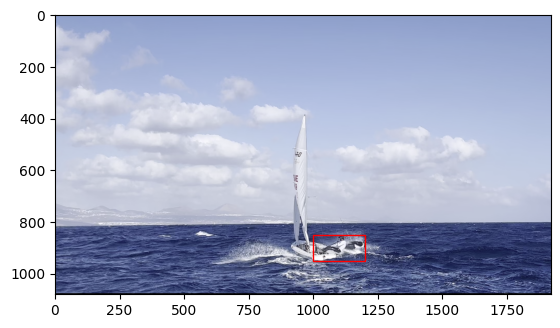

In [2]:
init_bbox = [1000, 850, 1200, 950]
plt = p.vis_bbox_first_frame(init_bbox,"C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov")
plt.show()

In [29]:
from model_api import calc_max_box_delta_x,calc_max_box_y,crop_video
import numpy as np
vid_path = "C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov"
#bboxes = p.calculate_sot_bbox(init_bbox,vid_path)
bboxes = [q["bbox"] for q in bboxes]
width = calc_max_box_delta_x(bboxes)
height = calc_max_box_y(bboxes)
bboxes = np.round(bboxes).astype(np.int32)
crop_video(vid_path,bboxes,"./output",int(width),int(height))

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 161.1 task/s, elapsed: 2s, ETA:     0s

In [11]:
type(bboxes[1][1])

numpy.float64

In [9]:
max(box_sizes)

21440.258

In [7]:
bboxes = [q["bbox"] for q in bboxes]

[array([ 1.0e+03,  8.5e+02,  1.2e+03,  9.5e+02, -1.0e+00]),
 array([9.9524561e+02, 8.4814655e+02, 1.1974087e+03, 9.4750861e+02,
        9.9972683e-01], dtype=float32),
 array([9.9391870e+02, 8.4702893e+02, 1.1958254e+03, 9.4855457e+02,
        9.9963844e-01], dtype=float32),
 array([9.9001868e+02, 8.4531262e+02, 1.1932377e+03, 9.4904370e+02,
        9.9951446e-01], dtype=float32),
 array([9.8371838e+02, 8.4602014e+02, 1.1866764e+03, 9.5090149e+02,
        9.9790251e-01], dtype=float32),
 array([9.8051282e+02, 8.4547003e+02, 1.1841063e+03, 9.4977435e+02,
        9.9706703e-01], dtype=float32),
 array([9.7572217e+02, 8.4532733e+02, 1.1798687e+03, 9.5028412e+02,
        9.9431121e-01], dtype=float32),
 array([9.7106396e+02, 8.4416486e+02, 1.1732671e+03, 9.4866681e+02,
        9.9476576e-01], dtype=float32),
 array([9.6859216e+02, 8.4353516e+02, 1.1684230e+03, 9.4818359e+02,
        9.8970395e-01], dtype=float32),
 array([9.6703680e+02, 8.4260938e+02, 1.1669441e+03, 9.4613062e+02,
        

In [5]:
p.apply_bounding_box_mask(init_bbox,"C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov")

2023-06-27 17:04:37,713 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-06-27 17:04:37,714 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-06-27 17:04:37,714 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 11.3 task/s, elapsed: 32s, ETA:     0s
 making the output video at output\sot.mp4 with a FPS of 30.0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 33.7 task/s, elapsed: 11s, ETA:     0s
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 58.2 task/s, elapsed: 6s, ETA:     0sWrote visualization video to output\out_17_05.mp4


In [4]:
from model_api import VisType
p.video_inference("C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\output\\out_15_22.mp4",vis_type=VisType.BBOX,bbox_threshold=0.1,framerate=10)

C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\output\out_15_22.mp4 has 30.0 fps


Processing frames:   0%|          | 0/121 [00:00<?, ?frames/s]c:\Users\A\anaconda3\envs\PCT_new_new\lib\site-packages\torch\utils\checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
Processing frames: 100%|██████████| 121/121 [01:52<00:00,  1.07frames/s]


Wrote visualization video to output/out_17_02.mp4
Total frames processed: 121


In [2]:
res=p.calculate_sot_bbox(init_bbox,"C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov")

NameError: name 'init_bbox' is not defined

In [5]:
#create a sligtly zoomed video

p.zoom_video("C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov",
           "C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\2x_zoomed_470Hiking.mp4",2)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 105.1 task/s, elapsed: 3s, ETA:     0sWrote visualization video to output\out_15_24.mp4


In [6]:
import mmcv
q=mmcv.VideoReader("C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov")

In [12]:
import numpy as np
bbox=np.array([ 1.0e+03,  8.5e+02,  1.2e+03,  9.5e+02, -1.0e+00])
#bbox = [int(coord) for coord in bbox]
bbox.astype(np.uint32)
bbox

array([ 1.0e+03,  8.5e+02,  1.2e+03,  9.5e+02, -1.0e+00])

In [7]:
res[0]["bbox"]

array([ 1.0e+03,  8.5e+02,  1.2e+03,  9.5e+02, -1.0e+00])

In [ ]:
#if checkpoints are missing
#!mkdir checkpoints
#!wget -c https://download.openmmlab.com/mmtracking/vid/selsa/selsa_faster_rcnn_r50_dc5_1x_imagenetvid/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth -P ./checkpoints
#!wget -c https://download.openmmlab.com/mmtracking/sot/siamese_rpn/siamese_rpn_r50_1x_lasot/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth -P ./checkpoints
#!wget -c https://download.openmmlab.com/mmtracking/vis/masktrack_rcnn/masktrack_rcnn_r50_fpn_12e_youtubevis2019/masktrack_rcnn_r50_fpn_12e_youtubevis2019_20211022_194830-6ca6b91e.pth -P ./checkpoints